In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

In [88]:
def vegetation(df):
    
    def water_balance(P, EP, Si_max):

        Si = np.zeros(len(P))
        Pe = np.zeros(len(P))
        for i in range(1, len(P)):
            Si[i] = Si[i-1] + P[i] 
            

            if Si[i] > Si_max:
                Pe[i] = Si[i] - Si_max
                Si[i] = Si[i] - Pe[i]

            Si[i] = Si[i]# - EP[i]
            if Si[i] < 0:
                Si[i] = 0

        df = pd.DataFrame()
        df['P'] = P
        df['EP'] = EP
        df['Si'] = Si
        df['Pe'] = Pe
        return df
    
    Si_max = .5 # mm
    df_wb = water_balance(df.P, df.pan_E, Si_max)
    
    
    fig, ax = plt.subplots(figsize=(8,6))
    df_wb['P'].plot(ax=ax)
    df_wb['Pe'].plot(ax=ax)
    ax.set_title('Hudson River')
    ax.legend()


    mean_P = df_wb['P'].mean()
    mean_Pe = df_wb['Pe'].mean()
    ratio = mean_Pe / mean_P
    
    return ratio, df_wb, fig


In [89]:
path = os.getcwd()
home_path = os.path.dirname(path)
data_folder = f'{home_path}\\Data'

In [90]:
files = glob.glob(f"{data_folder}\\*.parquet")
files

['C:\\Users\\anne-\\OneDrive - Delft University of Technology\\Documenten\\Environmental Engineering MSc\\ENVM1502-Catchment-model\\Data\\combined_data.parquet']

In [91]:
df_data = pd.read_parquet(files[0])

In [92]:
ratio, df, fig = vegetation(df_data)

<Axes: xlabel='index'>

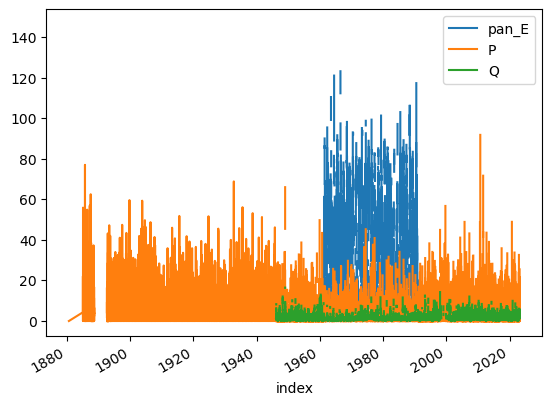

In [107]:
df_data.plot()

<Axes: xlabel='index'>

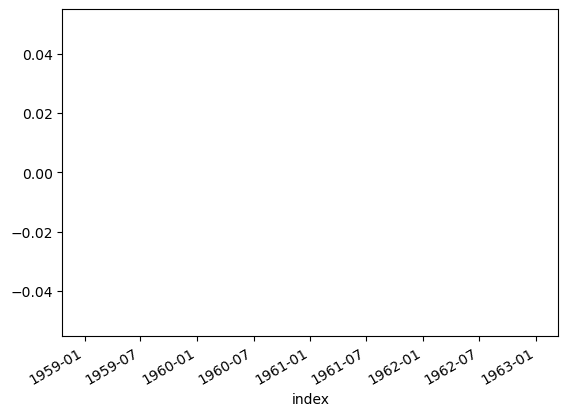

In [104]:
df.Si.plot()

P        EP   Si   Pe
index                             
1961-01-01 NaN  6.571429  0.0  0.0
1961-01-02 NaN  7.285714  NaN  0.0
1961-01-03 NaN  6.428571  NaN  0.0
1961-01-04 NaN  9.285714  NaN  0.0
1961-01-05 NaN  7.571429  NaN  0.0
...         ..       ...  ...  ...
2023-03-30 NaN       NaN  NaN  0.0
2023-03-31 NaN       NaN  NaN  0.0
2023-04-01 NaN       NaN  NaN  0.0
2023-04-02 NaN       NaN  NaN  0.0
2023-04-03 NaN       NaN  NaN  0.0

[87150 rows x 4 columns]